<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-11-08 16:21:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  21.0MB/s    in 1.7s    

2023-11-08 16:21:46 (21.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [26]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [82]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


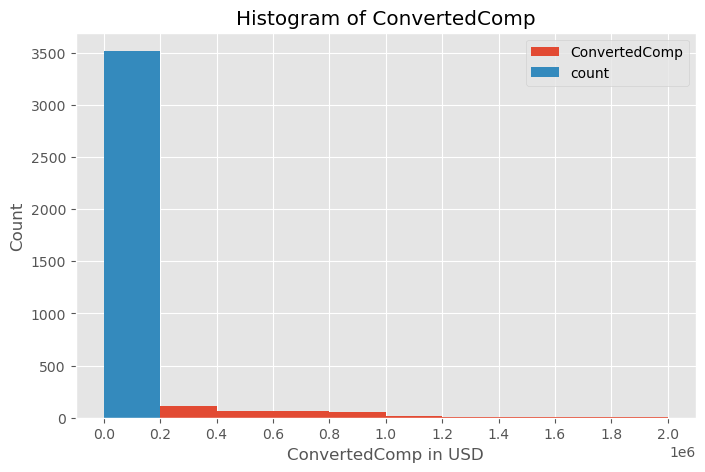

In [29]:
# your code goes here
mpl.style.use('ggplot')
QUERY = """
SELECT ConvertedComp,COUNT(*) as count
FROM master
group by ConvertedComp
order by ConvertedComp
"""
df = pd.read_sql_query(QUERY,conn)
df.dropna(subset=['ConvertedComp'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

count, bin_edges = np.histogram(df)
df.plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of ConvertedComp')
plt.ylabel('Count')
plt.xlabel('ConvertedComp in USD')

plt.show()

### Box Plots


Plot a box plot of `Age.`


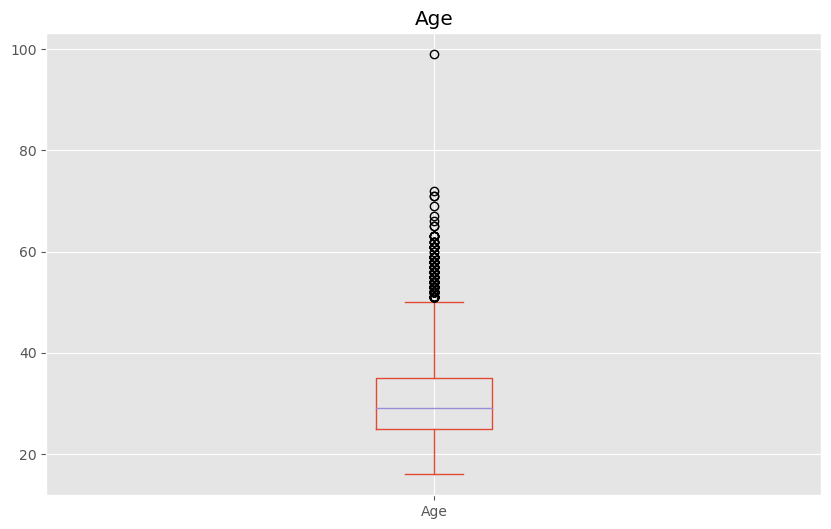

In [31]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
df1 = pd.read_sql_query(QUERY,conn)
df1.dropna(subset=['Age'], axis=0, inplace=True)
df1.reset_index(drop=True, inplace=True)

df1.plot(kind='box', figsize=(10, 6))
plt.title('Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


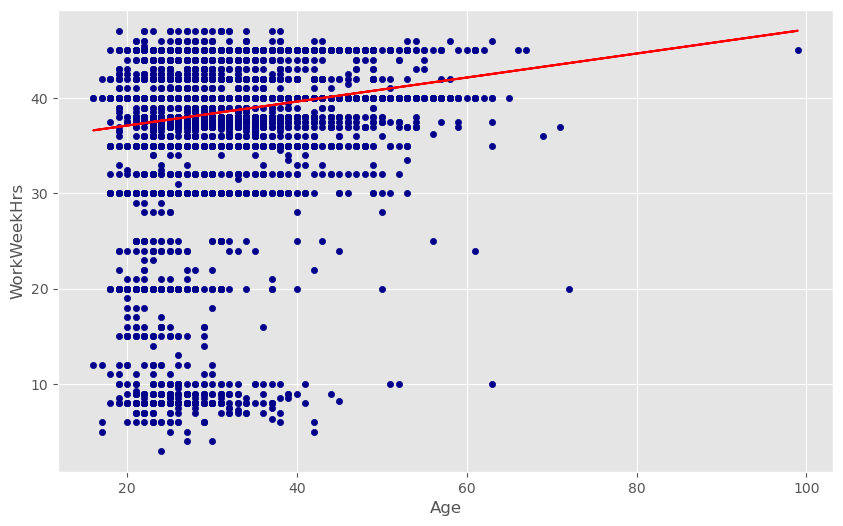

In [57]:
# your code goes here
# QUERY = """
# SELECT Age, WorkWeekHrs
# FROM master
# """
# df2 = pd.read_sql_query(QUERY,conn)
# df2.dropna(subset=['Age','WorkWeekHrs'], axis=0, inplace=True)
# df2.reset_index(drop=True, inplace=True)
# q1, q3 = np.percentile(df2['WorkWeekHrs'],[25,75])
# iqr = q3 - q1
# outliners = q3 + (1.5 * iqr)
# print(q1, q3, iqr, outliners)
# upper_array=np.array(df2['WorkWeekHrs']>=outliners)
# # print(upper_array)
# out_index=np.where(df2['WorkWeekHrs']>=outliners)[0]
# # print(upper_array1)
# print("Upper Bound:",outliners)
# print(upper_array.sum())
# df2.drop(index=out_index, axis = 0, inplace=True)
# df2.reset_index(drop=True, inplace=True)
# df2.shape

x = df2['Age']      # year on x-axis
y = df2['WorkWeekHrs']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit
df2.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(10, 60))

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


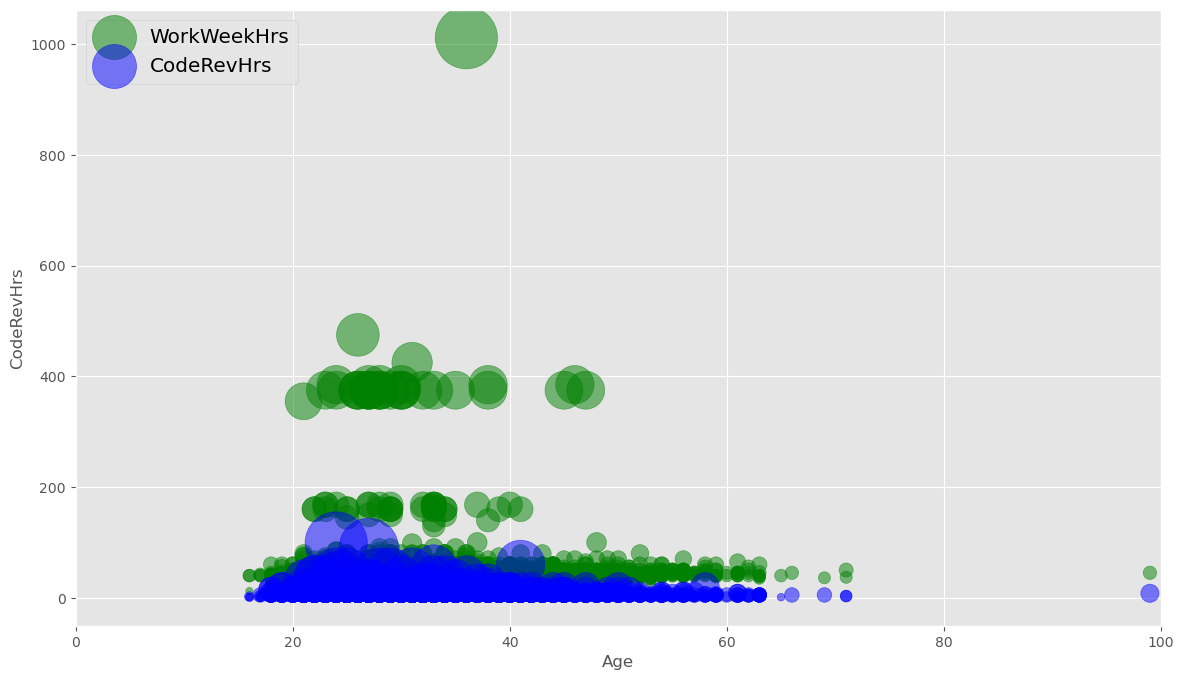

In [63]:
# your code goes here
# QUERY = """
# SELECT Age, WorkWeekHrs, CodeRevHrs
# FROM master
# """
# df3 = pd.read_sql_query(QUERY,conn)
# df3.dropna(subset=['Age','WorkWeekHrs','CodeRevHrs'], axis=0, inplace=True)
# df3.reset_index(drop=True, inplace=True)

norm_WorkWeekHrs = (df3['WorkWeekHrs'] - df3['WorkWeekHrs'].min()) / (df3['WorkWeekHrs'].max() - df3['WorkWeekHrs'].min())
norm_CodeRevHrs = (df3['CodeRevHrs'] - df3['CodeRevHrs'].min()) / (df3['CodeRevHrs'].max() - df3['CodeRevHrs'].min())
# WorkWeekHrs
ax0 = df3.plot(kind='scatter',
                    x='Age',
                    y='WorkWeekHrs',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_WorkWeekHrs * 2000 + 10,  # pass in weights 
                    xlim=(0, 100)
                    )

# CodeRevHrs
ax1 = df3.plot(kind='scatter',
                    x='Age',
                    y='CodeRevHrs',
                    alpha=0.5,
                    color="blue",
                    s=norm_CodeRevHrs * 2000 + 10,
                    ax=ax0
                    )

ax0.legend(['WorkWeekHrs', 'CodeRevHrs'], loc='upper left', fontsize='x-large')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


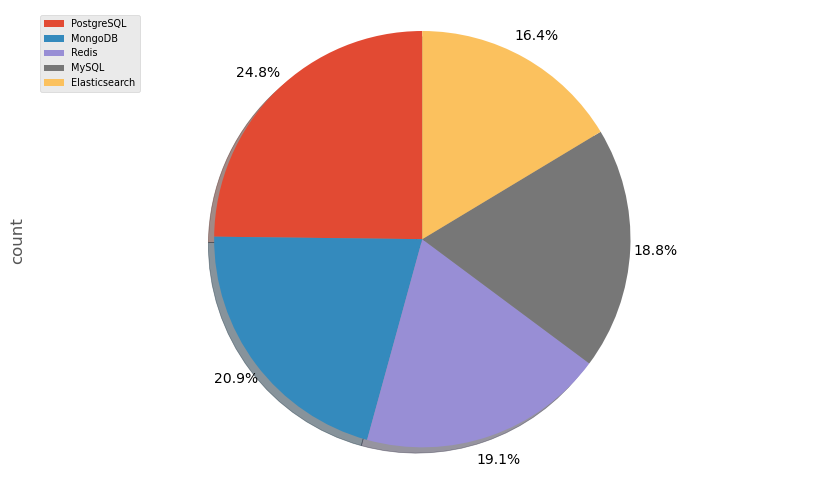

In [72]:
# your code goes here
# QUERY = """
# SELECT DatabaseDesireNextYear, COUNT(*) as count
# FROM DatabaseDesireNextYear
# GROUP BY DatabaseDesireNextYear
# ORDER BY count desc
# LIMIT 5
# """
# df4 = pd.read_sql_query(QUERY,conn)
# df4.set_index('DatabaseDesireNextYear', inplace=True)
# df4
# explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df4['count'].plot(kind='pie',
                    figsize=(10, 6),
                    autopct='%1.1f%%', 
                    startangle=90,    
                    shadow=True,       
                    labels=None,         # turn off labels on pie chart
                    pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                    #colors=colors_list,  # add custom colors
                    #explode=explode_list # 'explode' lowest 3 continents
                            )

plt.axis('equal') 

# add legend
plt.legend(labels=df4.index, loc='upper left', fontsize=7) 

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


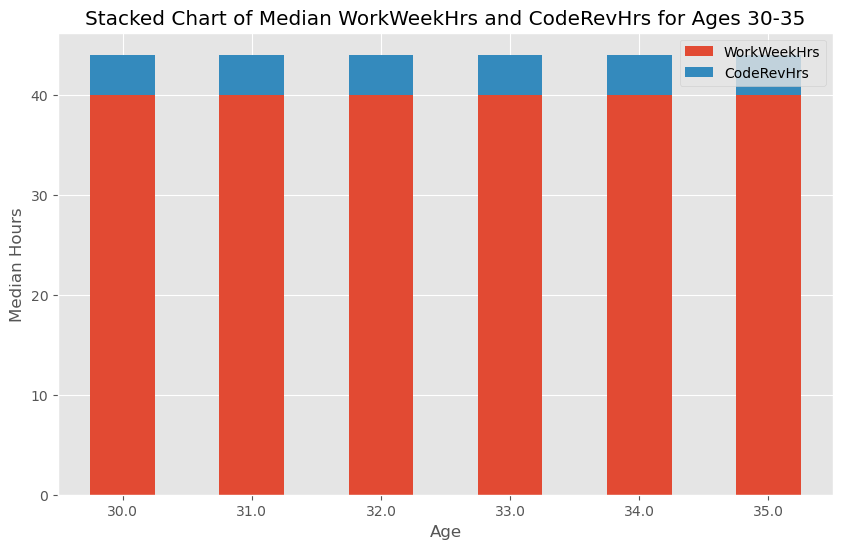

In [78]:
# your code goes here
# QUERY = """
# SELECT Age, WorkWeekHrs, CodeRevHrs
# FROM master
# where age between 30 and 35
# order by age
# """
# df5 = pd.read_sql_query(QUERY,conn)
# df5.dropna(subset=['Age','WorkWeekHrs','CodeRevHrs'], axis=0, inplace=True)
# df5.reset_index(drop=True, inplace=True)
grouped_data = df5.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Ages 30-35")
plt.xlabel("Age")
plt.ylabel("Median Hours")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [100]:
QUERY = """
SELECT DatabaseWorkedWith, count(Respondent)
from DatabaseWorkedWith
group by DatabaseWorkedWith
order by count(Respondent) desc
"""
pd.read_sql_query(QUERY,conn)


,DatabaseWorkedWith,count(Respondent)
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016
5,Redis,2508
6,Elasticsearch,1954
7,Oracle,1744
8,MariaDB,1709
9,Firebase,1314


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Figure size 1000x600 with 0 Axes>

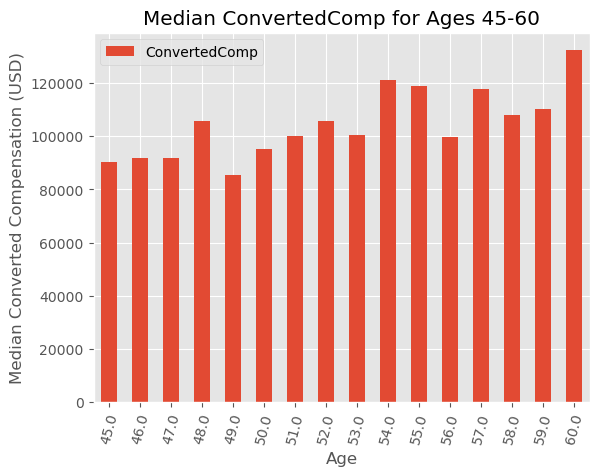

In [109]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
where age between 45 and 60
order by age
"""
df6 = pd.read_sql_query(QUERY,conn)
df6.dropna(subset=['Age','ConvertedComp'], axis=0, inplace=True)
df6.reset_index(drop=True, inplace=True)
grouped_data2 = df6.groupby('Age')[['ConvertedComp']].median()
plt.figure(figsize=(10, 6))
grouped_data2.plot(kind='bar')
plt.title("Median ConvertedComp for Ages 45-60")
plt.xlabel("Age")
plt.ylabel("Median Converted Compensation (USD)")
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Figure size 1000x600 with 0 Axes>

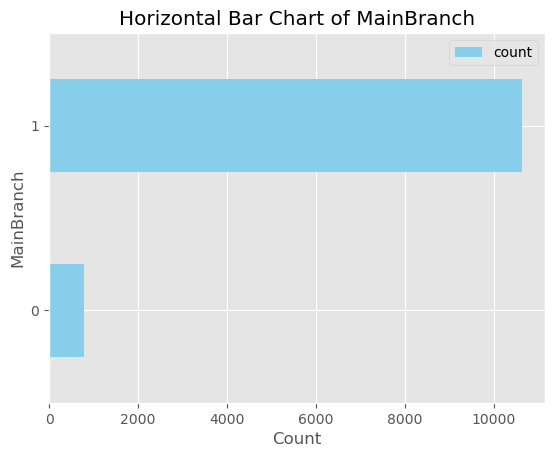

In [111]:
# your code goes here
QUERY = """
SELECT MainBranch, count(*) as count
FROM master
group by MainBranch
order by MainBranch desc
"""
df7 = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10, 6))
df7.plot(kind='barh', color='skyblue')
plt.title("Horizontal Bar Chart of MainBranch")
plt.xlabel("Count")
plt.ylabel("MainBranch")

# Show the plot
plt.show()

In [114]:
QUERY = """
SELECT DevType, count(*)
FROM DevType
group by DevType
order by count(*) desc
"""
pd.read_sql_query(QUERY,conn)

,DevType,count(*)
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
